### A Happier Healthier Me

In [19]:
#Import all the libraries neccesary
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#Assign datasets to a name for easier access
questions_choices = 'C:/Users/valde/Desktop/A_happier_healthier_me/A_happier_healthier_me/Datasets/survey_answers.csv'

In [21]:
#Read the dataset
questions_choices = pd.read_csv(questions_choices)

In [22]:
#Display 5 lines to see if data is good
display(questions_choices.sample(5))

,Age Group,Gender,Education Level,Ethnicity,Frequency of Exercise,Physical Activities,Barriers to Physical Activities,Sugary Beverages per Week,Fruit Consumption Frequency,Challenges to Eating Healthy,Reason for Skipping Meals
18,18-24,Female,College,Black or African American,Often,"Walking, Gym Workouts",Lack of motivation,2-3,5 or more,Time to prepare meals,Not enough time
15,Under 18,Male,High School,Black or African American,Often,"Walking, Running, Sports","Lack of time, Lack of motivation",4-6,3-4,"Cost of healthy food, Time to prepare meals",No food at home
10,25-34,Female,College,Black or African American,Often,"Walking, Gym Workouts",Lack of motivation,7 or more,3-4,"Cost of healthy food, Time to prepare meals",Not enough time
14,Under 18,Male,High School,Black or African American,Often,"Walking, Running, Gym Workouts",Lack of time,2-3,3-4,Lack of knowledge,Save money
6,18-24,Female,College,"American Indian or Alaska Native, Black or Afr...",Not at all,"Walking, Other",Lack of motivation,7 or more,5 or more,Time to prepare meals,No food at home


The following code will clean the "questions_choices"

In [23]:
#Print the information for the dataset
questions_choices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age Group                        24 non-null     object
 1   Gender                           24 non-null     object
 2   Education Level                  18 non-null     object
 3   Ethnicity                        24 non-null     object
 4   Frequency of Exercise            24 non-null     object
 5   Physical Activities              24 non-null     object
 6   Barriers to Physical Activities  24 non-null     object
 7   Sugary Beverages per Week        24 non-null     object
 8   Fruit Consumption Frequency      24 non-null     object
 9   Challenges to Eating Healthy     24 non-null     object
 10  Reason for Skipping Meals        24 non-null     object
dtypes: object(11)
memory usage: 2.2+ KB


In [24]:
#It seems like education level is missing or contains N/A, we will replace these"
missing_education_level = questions_choices[questions_choices['Education Level'].isna()]
display(missing_education_level.head(5))

,Age Group,Gender,Education Level,Ethnicity,Frequency of Exercise,Physical Activities,Barriers to Physical Activities,Sugary Beverages per Week,Fruit Consumption Frequency,Challenges to Eating Healthy,Reason for Skipping Meals
2,25-34,Female,NaN,Black or African American,Not at all,Walking,Lack of time,4-6,1-2,Lack of knowledge,Not enough time
5,18-24,Male,NaN,Black or African American,Often,"Walking, Gym Workouts",Lack of time,0-1,3-4,Time to prepare meals,Not enough time
11,18-24,Female,NaN,"Black or African American, Hispanic, Latino or...",Often,"Walking, Running, Sports, Gym Workouts","Lack of motivation, Health Issues",2-3,5 or more,Cost of healthy food,Not enough time
13,44+,Female,NaN,Black or African American,Often,"Walking, Other",Lack of motivation,0-1,1-2,(No Answer Selected),(No Answer Selected)
20,25-34,Female,NaN,Black or African American,Everyday,Gym Workouts,(No Answer Selected),4-6,5 or more,Time to prepare meals,Not enough time


In [25]:
#Fill missing values in the "Education Level" column with "Not in school"
questions_choices['Education Level'] = questions_choices['Education Level'].fillna('Not in school')

In [26]:
#We will check if these values are still empty
print(questions_choices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age Group                        24 non-null     object
 1   Gender                           24 non-null     object
 2   Education Level                  24 non-null     object
 3   Ethnicity                        24 non-null     object
 4   Frequency of Exercise            24 non-null     object
 5   Physical Activities              24 non-null     object
 6   Barriers to Physical Activities  24 non-null     object
 7   Sugary Beverages per Week        24 non-null     object
 8   Fruit Consumption Frequency      24 non-null     object
 9   Challenges to Eating Healthy     24 non-null     object
 10  Reason for Skipping Meals        24 non-null     object
dtypes: object(11)
memory usage: 2.2+ KB
None


In [27]:
#Values seem to be good now
print(questions_choices['Education Level'].value_counts())

Education Level
College          12
Not in school     6
High School       6
Name: count, dtype: int64


Values add up to 24 which is the number of entries for the survey

In [28]:
#Previously noticed some place have the words (No Answer Selected), these will be replaced with N/A
questions_choices = questions_choices.replace("(No Answer Selected)", "N/A")

# Check if the replacement worked
display(questions_choices.sample(5))

,Age Group,Gender,Education Level,Ethnicity,Frequency of Exercise,Physical Activities,Barriers to Physical Activities,Sugary Beverages per Week,Fruit Consumption Frequency,Challenges to Eating Healthy,Reason for Skipping Meals
21,18-24,Female,Not in school,"Hispanic, Latino or Spanish Origin",Not at all,Walking,"Lack of time, Lack of motivation",2-3,3-4,Cost of healthy food,Not enough time
6,18-24,Female,College,"American Indian or Alaska Native, Black or Afr...",Not at all,"Walking, Other",Lack of motivation,7 or more,5 or more,Time to prepare meals,No food at home
2,25-34,Female,Not in school,Black or African American,Not at all,Walking,Lack of time,4-6,1-2,Lack of knowledge,Not enough time
18,18-24,Female,College,Black or African American,Often,"Walking, Gym Workouts",Lack of motivation,2-3,5 or more,Time to prepare meals,Not enough time
9,Under 18,Non-binary,High School,Black or African American,Often,Other,Lack of time,2-3,5 or more,Lack of knowledge,Save money


In [29]:
#Print the number of N/A slots for all columns
na_count_string = (questions_choices == "N/A").sum().sum()

print(f'The number of "N/A" occurrences in the dataset is: {na_count_string}')

The number of "N/A" occurrences in the dataset is: 4


In [30]:
#Export dataset for PowerBi
#questions_choices.to_csv('powerbi_survey_dataset.csv', index=False)

### Meal discounts for college students

In [31]:
# Create a subset with the required columns
education_challenges_data = questions_choices[['Education Level', 'Challenges to Eating Healthy']]

# Display the first few rows of the subset
education_challenges_data.head(24)

,Education Level,Challenges to Eating Healthy
0,College,Time to prepare meals
1,College,"Cost of healthy food, Time to prepare meals"
2,Not in school,Lack of knowledge
3,College,Time to prepare meals
4,College,Time to prepare meals
5,Not in school,Time to prepare meals
6,College,Time to prepare meals
7,College,Cost of healthy food
8,High School,Cost of healthy food
9,High School,Lack of knowledge


In [32]:
#Creating a count for each combination of Education Levels and Challenges to Eating Healthy
education_challenges_counts = education_challenges_data.groupby(['Education Level', 'Challenges to Eating Healthy']).size().unstack(fill_value=0)

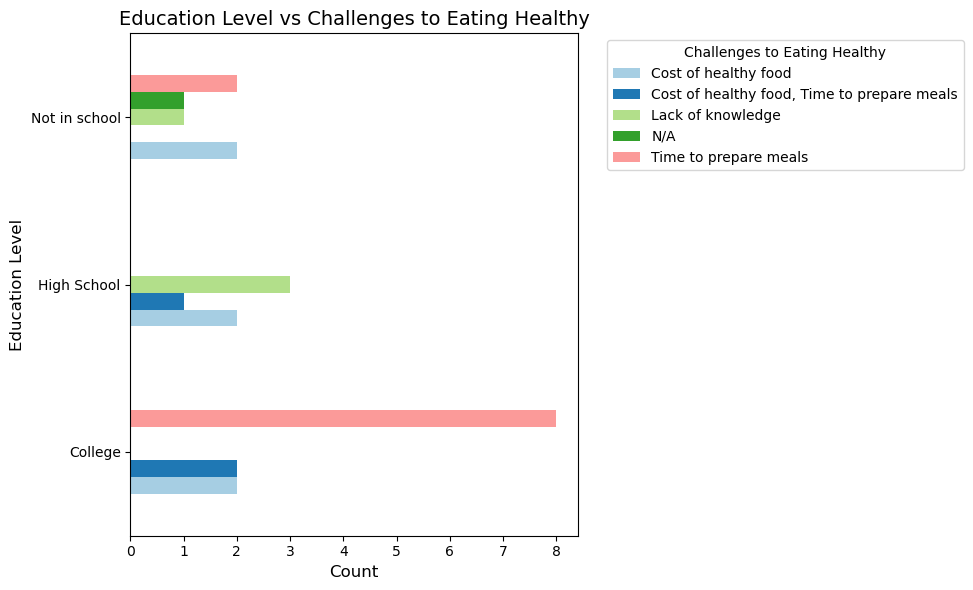

In [33]:
education_challenges_counts.plot(kind='barh', stacked=False, figsize=(10, 6), color=plt.cm.Paired.colors)

#Adding labels and title
plt.title('Education Level vs Challenges to Eating Healthy', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.legend(title='Challenges to Eating Healthy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Display the plot
plt.show()